In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/fcc-forum-pageviews.csv')
df.head(5)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [ ]:
date_parser=lambda x:datetime.strptime(x,'%Y-%m-%d')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/fcc-forum-pageviews.csv',parse_dates=['date'],date_parser=date_parser)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


/tmp/ipython-input-3283908167.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/fcc-forum-pageviews.csv',parse_dates=['date'],date_parser=date_parser)


In [ ]:
df.set_index('date',inplace=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [ ]:
top_percentile = df.value.quantile(0.9)
bottom_percentile = df.value.quantile(0.025)
df = df[((df.value > bottom_percentile) & (df.value < top_percentile))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-10-02,99416
2019-10-03,98737
2019-10-04,91873


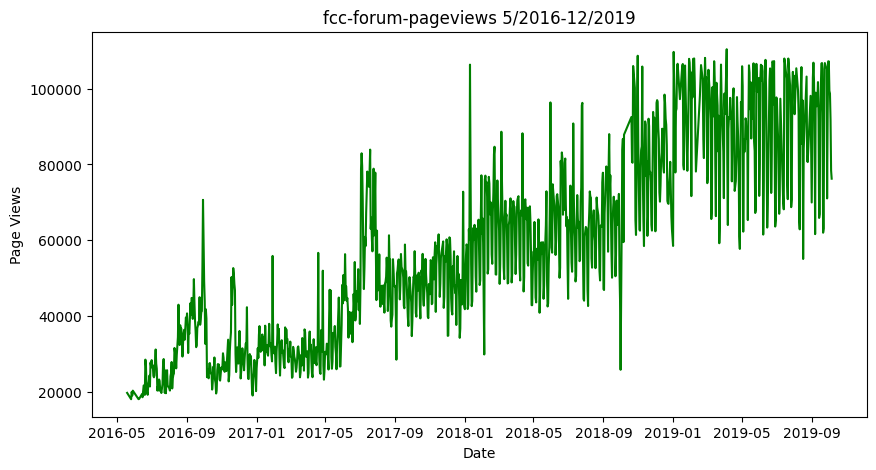

In [ ]:
#fig, ax = plt.subplots(figsize=(10, 5))
fig = plt.figure(figsize=(10, 5))
plt.plot(df.index, df.value, color = "green")
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title("fcc-forum-pageviews 5/2016-12/2019")
plt.show()

In [ ]:
df.loc[:, 'month'] = df.index.month
df.loc[:, 'year'] = df.index.year

/tmp/ipython-input-4056866542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'month'] = df.index.month
/tmp/ipython-input-4056866542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'year'] = df.index.year


In [ ]:
df

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-10-02,99416,10,2019
2019-10-03,98737,10,2019
2019-10-04,91873,10,2019


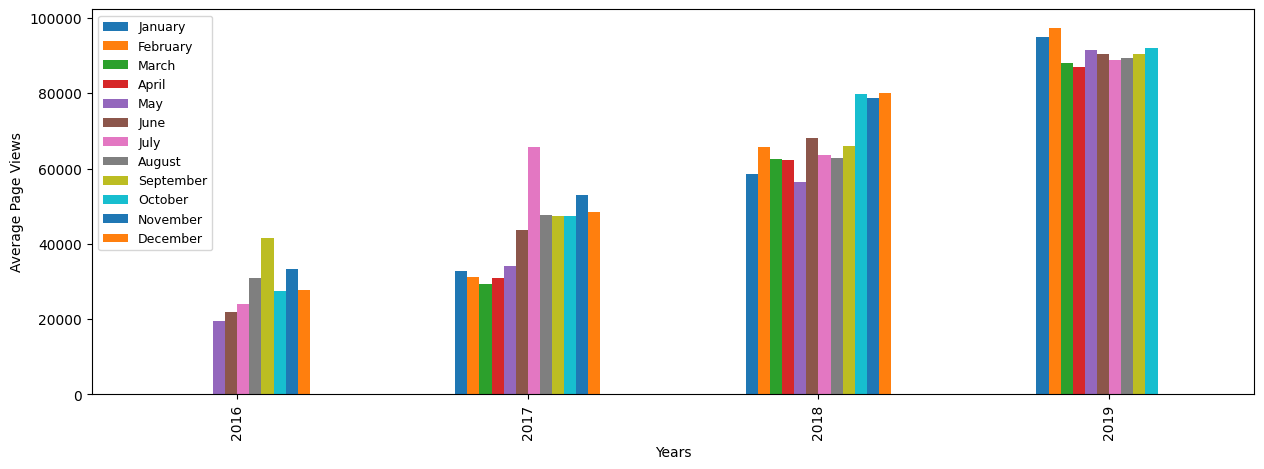

In [ ]:
df_barbar = df.groupby(['month','year']).value.mean()
fig = df_bar.unstack(0).plot.bar(figsize=(15,5))
plt.xlabel('Years')
plt.ylabel('Average Page Views')
months=["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.legend(fontsize = 9, labels = months,loc="upper left")
plt.show()

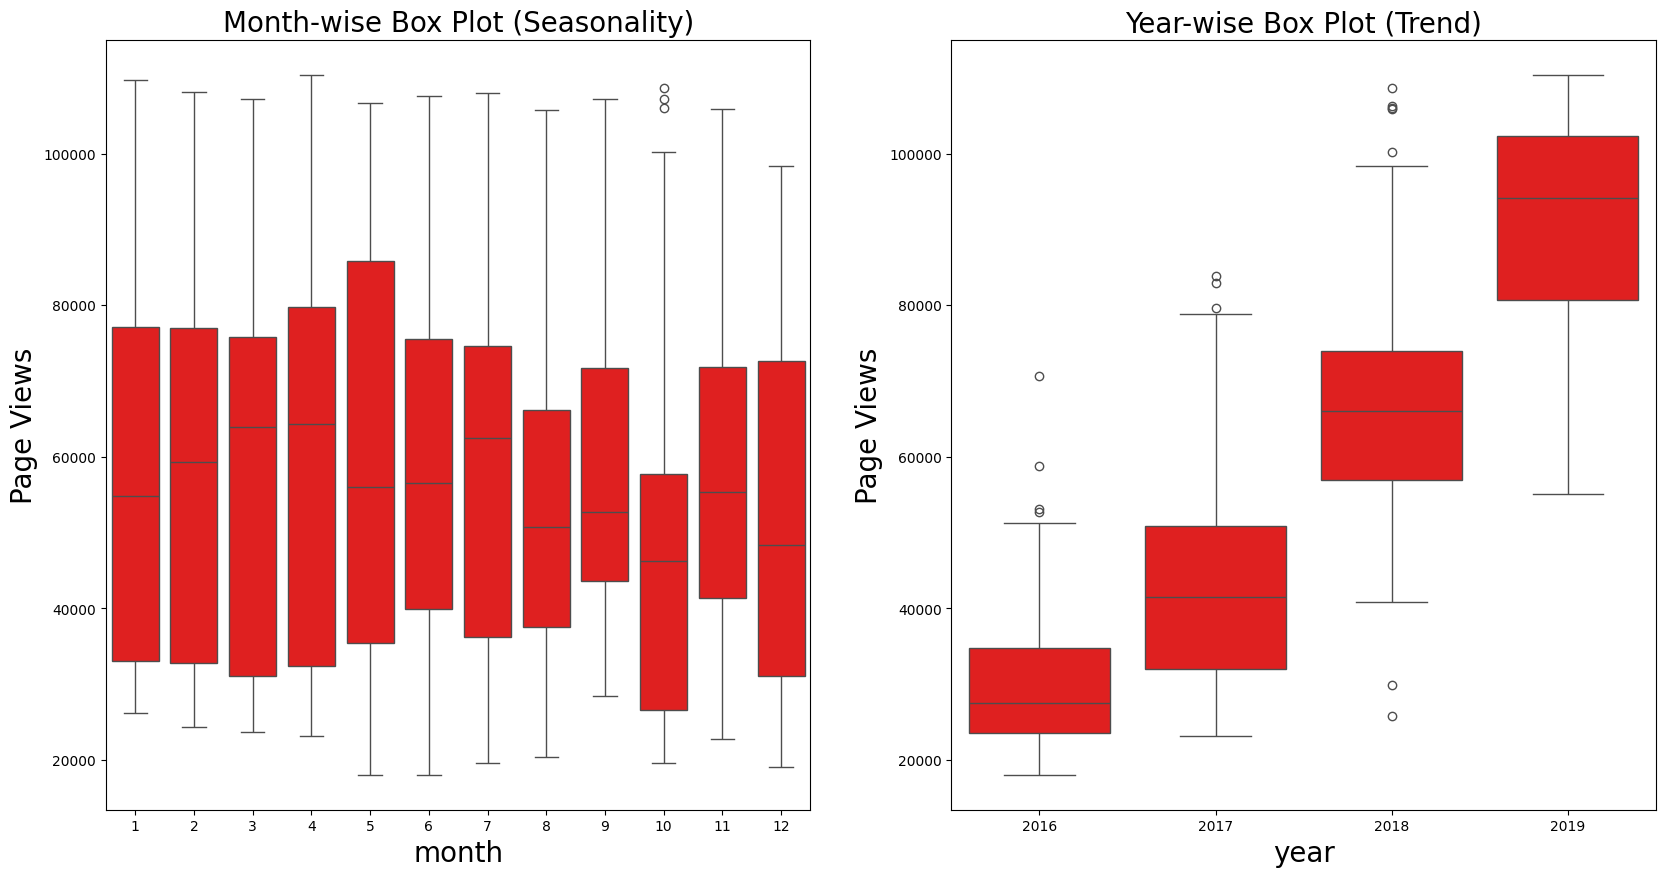

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
font={'size':20}
ax1 = sns.boxplot(x="month", y="value", data=df, ax = axes[0],color='red')
ax1.set_xlabel('month',fontdict=font)
ax1.set_ylabel('Page Views',fontdict=font)
ax1.set_title("Month-wise Box Plot (Seasonality)",fontdict=font)

ax2 = sns.boxplot(x="year", y="value", data=df, ax = axes[1],color='red')
ax2.set_xlabel('year',fontdict=font)
ax2.set_ylabel('Page Views',fontdict=font)
ax2.set_title("Year-wise Box Plot (Trend)",fontdict=font)

plt.show()